## THE SPARKS FOUNDATION

### TASK 1 - Prediction using Supervised ML

###### To Predict the percentage of marks of the students based on the number of hours they studied

## Author - Varun Malani

In [1]:
# Importing all the modules requires for this project
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data set
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Validating the dataframe to check if there are any null values 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

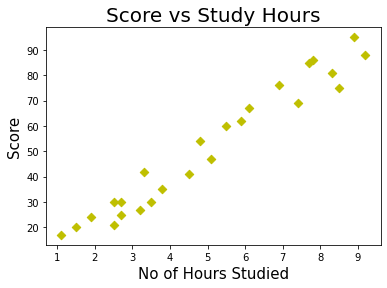

In [4]:
# Plotting a scatter plot 
plt.scatter(df.Hours,df.Scores,color='y',marker='D')
plt.xlabel("No of Hours Studied",size=15)
plt.ylabel("Score",size=15)
plt.title("Score vs Study Hours",size=20)
plt.show()

### Training the Model

#### 1) Splitting the data

In [5]:
# Assigning the value to X 
X = df[['Hours']]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [6]:
# Assigning the value to X 
y = df['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [7]:
# Training and testing the data set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [8]:
# Now creating a Linear Regression model
reg = LinearRegression()

#### 2) Fitting the data

In [9]:
# Fitting the data into the linear regression model
reg.fit(X_train,y_train)

LinearRegression()

#### 3) Finding the coefficient and intercept of the line y = mx + c

In [10]:
reg.coef_

array([9.91065648])

In [11]:
reg.intercept_

2.018160041434662

In [12]:
# The accuracy of the model
reg.score(X,y)*100

95.26947647057273

#### 4) Creating a new dataframe to add the predicted output

In [13]:
# Creating a new dataframe to include the presicted marks
final_df = df
final_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
predicted_list = []
for i in df.Hours:
    x = reg.predict([[i]])
    predicted_list.append(x) 

In [15]:
final_df['Predicted Output'] = predicted_list

In [16]:
final_df['Predicted Output'] = final_df['Predicted Output'].astype(float)

In [17]:
final_df.head()

,Hours,Scores,Predicted Output
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458


#### 5) Visually Comparing the Predicted Marks with the Actual Marks

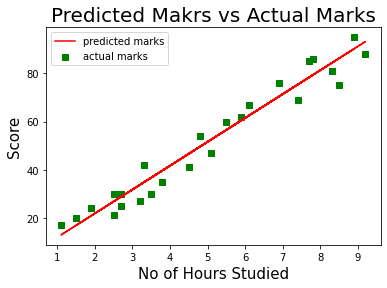

In [18]:
plt.scatter(final_df.Hours,final_df.Scores,color='g',marker='s',label='actual marks')
plt.plot(final_df.Hours,final_df['Predicted Output'],color='r',label='predicted marks')
plt.xlabel("No of Hours Studied",size=15)
plt.ylabel("Score",size=15)
plt.title("Predicted Makrs vs Actual Marks",size=20)
plt.legend()
plt.show()

#### 6) What will be the predicted score of the student if he/she studies for 9.25 hrs/day?

In [21]:
predicted_score = reg.predict([[9.25]])
print(f'The score of the student if he/she studies 9.25hrs/day is {predicted_score[0]}')

The score of the student if he/she studies 9.25hrs/day is 93.69173248737539
